In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
%matplotlib inline
import seaborn as sns
sns.set() 
#plt.rcParams["figure.figsize"] = (20,10)

# Setup display options of the notebook
#pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 111)

# Decision Trees House Price Prediction

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1FqJTRKcC8XtatAtpJlhHE0zvFHUGelWz/preview" width="640" height="480" allow="autoplay">
</iframe>

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1Q3BgY9UwIEHDkjjJNJomg-_WUmIAQnFk/preview" width="640" height="480" allow="autoplay">
</iframe>

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1dfqBT6ewhS1ltrYQ7wOvPgRXhtTKZUSg/preview" width="640" height="480" allow="autoplay">
</iframe>

In [ ]:
def image_linker(links): 
  """  Au fait, j'ai créé une fonction pour convertir les liens en liens partageables au cas où vous en auriez beaucoup """

  ids = []   
  for link in links: 
    id = link[32:65] 
    ids.append(id) 
  new_links = [] 
  for i in ids: 
    id_link = 'drive.google.com/uc?export=view&id='+ i 
    new_links.append(id_link) 
  return new_links 


##Vous devrez peut-être autoriser les cookies tiers pour que l'image apparaisse ! Cela m'a donné un mal de tête 1h en essayant toutes les combinaisons de uc?export=view&id=..., uc?id=... et ainsi de suite. – cbo 26 février à 11:42 
##Votre réponse ne fonctionne qu'avec cette simple modification ici: 
    ## 1. faites un clic droit sur l'image dans votre lecteur google et cliquez sur Get Link.
    ## 2. choisissez Any one with this link, puis cliquez sur copier le lien, par exemple drive.google.com/file/d/1VbCjqRtQRun8lv7xOcBiZd7FidqU9lyh/… .
     ##Voici 1VbCjqRtQRun8lv7xOcBiZd7FidqU9lyh l'identifiant dont vous avez besoin pour la prochaine étape. 
    ## 3. mettez ceci dans votre cellule de texte colab : ![]( drive.google.com/… ) 

## Common Terms Used With Decision Trees

<ol>
    <li>Root Node: It represents entire population or sample and this further gets divided into two or more homogeneous sets.</li>
    <li>Splitting: It is a process of dividing a node into two or more sub-nodes.</li>
    <li>Decision Node: When a sub-node splits into further sub-nodes, then it is called decision node.</li>
    <li>Leaf/ Terminal Node: Nodes do not split is called Leaf or Terminal node.</li>
    <li>Pruning: When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.</li>
    <li>Branch / Sub-Tree: A sub section of entire tree is called branch or sub-tree.</li>
    <li>Parent and Child Node: A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node.</li>
</ol>

# Advantages and Disadvantages OF DT

<h1>Advantages</h1>

<ul>
    <li>Easy To Understand</li>
    <li>Easy to generate rules</li>
</ul>


<h1>Disadvantages</h1>
<ul>
    <li>May suffer from overfitting</li>
    <li>Do not easily handle numeric data</li>
    <li>Can be quite large prunning is neccessary</li>
</ul>

# What is Regression

<p>Regression is a statistical measurement used in finance, investing, and other disciplines that attempts to determine the strength of the relationship between one dependent variable (usually denoted by Y) and a series of other changing variables (known as independent variables).


Regression helps investment and financial managers to value assets and understand the relationships between variables, such as commodity prices and the stocks of businesses dealing in those commodities.</p>

In [ ]:
df= pd.read_csv('Melbourne_housing_FULL.csv')

In [ ]:
df.shape

(34857, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


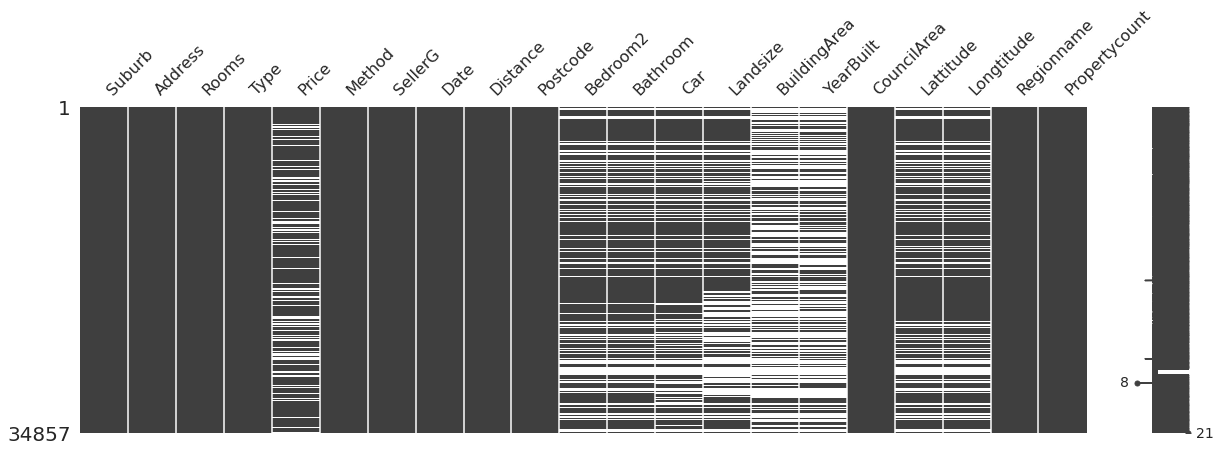

In [ ]:
mno.matrix(df, figsize = (20, 6))

In [ ]:
for i in (df.columns):
    # count number of rows with missing values
    n_miss = df[i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    
    print('> {}, Missing: {}  total {} %' .format (i, n_miss, perc))

> Suburb, Missing: 0  total 0.0 %
> Address, Missing: 0  total 0.0 %
> Rooms, Missing: 0  total 0.0 %
> Type, Missing: 0  total 0.0 %
> Price, Missing: 7610  total 21.83205668875692 %
> Method, Missing: 0  total 0.0 %
> SellerG, Missing: 0  total 0.0 %
> Date, Missing: 0  total 0.0 %
> Distance, Missing: 1  total 0.002868864216656626 %
> Postcode, Missing: 1  total 0.002868864216656626 %
> Bedroom2, Missing: 8217  total 23.573457268267493 %
> Bathroom, Missing: 8226  total 23.599277046217402 %
> Car, Missing: 8728  total 25.03944688297903 %
> Landsize, Missing: 11810  total 33.88128639871475 %
> BuildingArea, Missing: 21115  total 60.576067934704646 %
> YearBuilt, Missing: 19306  total 55.38629256677281 %
> CouncilArea, Missing: 3  total 0.008606592649969878 %
> Lattitude, Missing: 7976  total 22.882060992053248 %
> Longtitude, Missing: 7976  total 22.882060992053248 %
> Regionname, Missing: 3  total 0.008606592649969878 %
> Propertycount, Missing: 3  total 0.008606592649969878 %


<p>On remarque que le BuildingArea et le YearBuilt ont plus de 50% de valeurs manquantes</p>.

You can already see that the BuildingArea column has the first entry as NaN which means the value is not available there. We can go ahead and drop all the rows which does not have the BuildingArea value or we can drop the BuildingArea column altogether.



In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
## df= df.dropna(axis=0)
df.dropna(inplace =True)

In [ ]:
df.shape

(8887, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8887 non-null   object 
 1   Address        8887 non-null   object 
 2   Rooms          8887 non-null   int64  
 3   Type           8887 non-null   object 
 4   Price          8887 non-null   float64
 5   Method         8887 non-null   object 
 6   SellerG        8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom2       8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtit

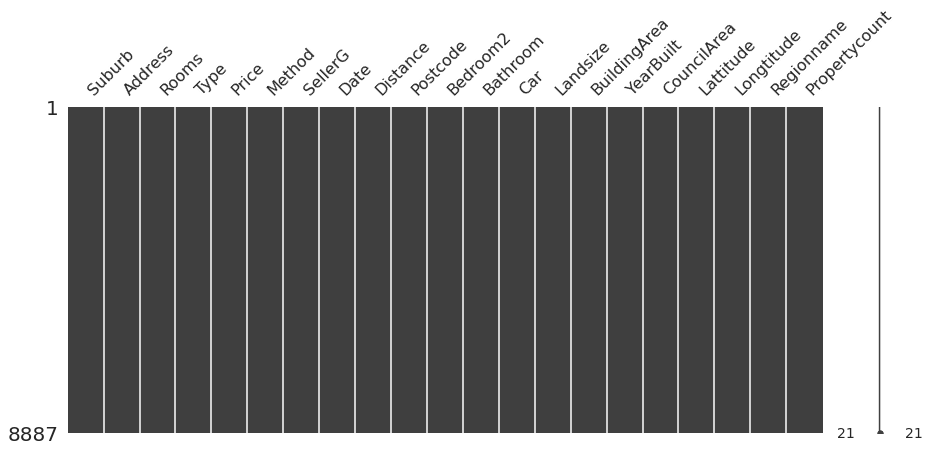

In [ ]:
#dropna function in Pandas removes all the rows with missing values

mno.matrix(df, figsize = (15, 6))

Both the approaches have their own advantages and disadvantages and you will have to analyze for your use case to decide what needs to be done. If we drop the rows our total number of data points to train our model will go down which can reduce the model performance. Do this only if you have large number of training examples and the rows with missing data are not very high in number. Dropping the column altogether will remove a feature from our model i.e the model predictions will be independent of the building area. Sometimes you can drop variables or columns if the data is missing for more than 60% observations but only if that variable is insignificant. In general dropping data is not a good approach in most cases since you loose a lot of potentially useful information. Lets look at a better approach for dealing with missing data.

In [ ]:
#df['BuildingArea'].fillna(df['BuildingArea'].mean(), inplace=True)
#df.head(5)


#2. Replace with mean value
#works only with Numerical features

#from sklearn.impute import SimpleImputer
#my_imputer = SimpleImputer()
#data_selected = data[['Rooms','Bedroom2', 'Bathroom', 'Car', 'Landsize','Price', 'Lattitude', 'Longtitude', 'Propertycount', 'BuildingArea']]
#data_with_imputed_values = my_imputer.fit_transform(data_selected)
#df=pd.DataFrame(data_with_imputed_values)
#df.head()


# make copy to avoid changing original data (when Imputing)
#new_data = data_selected.copy()


# Imputation
#my_imputer = SimpleImputer()
#new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
#new_data.columns = data_selected.columns

- A Better Option: Imputation
A slightly better approach towards handling missing data is Imputation. Imputation means to replace or fill the missing data with some value. Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely.

- There are lot of ways to impute the data:
    1. A constant value that belongs to the set of possible values of that variable, such as 0, distinct from all other values
    2. A mean, median or mode value for the column
    3. A value estimated by another predictive model
    4. Multiple Imputation

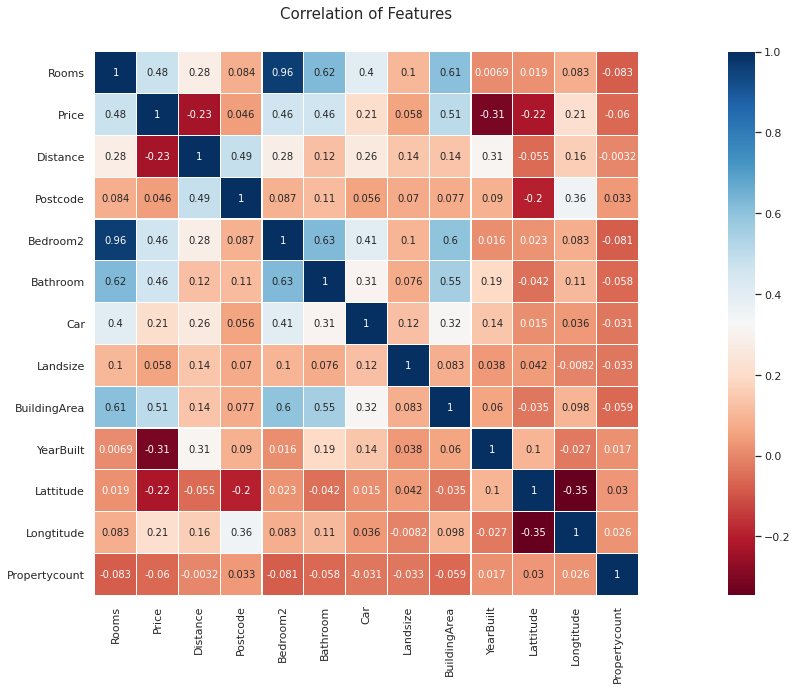

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

A premier vue buldingarea n'est pas trop corrélé au price.

We then plot a correlation matrix to find out which variables are correlated to each other which we will use as independent predictor variables for predicting missing values.

We see that our variable of interest BuildingArea is correlated to Rooms, Bedroom2, Bathroom, Car, Landsize. We will use these variables to predict the missing values of BuilaingArea.

The predicted values from the model are inserted into the original dataframe. It theoretically provides good estimates for missing values. However, there are several disadvantages of this model which tend to outweigh the advantages. The replaced values are completely determined by a model applied to other variables and they tend to fit together too well, in other words, they contain no error. One must also assume that there is a linear relationship between the variables used in the regression equation which may not be the case always.

In [ ]:
df.corr()['Price']

Rooms            0.475074
Price            1.000000
Distance        -0.231212
Postcode         0.046033
Bedroom2         0.460880
Bathroom         0.463501
Car              0.209464
Landsize         0.058375
BuildingArea     0.507284
YearBuilt       -0.313664
Lattitude       -0.224255
Longtitude       0.212174
Propertycount   -0.059720
Name: Price, dtype: float64

In [ ]:
#from sklearn.impute import SimpleImputer
## make copy to avoid changing original data (when Imputing)
#df_selected = df[['Rooms','Bedroom2', 'Bathroom', 'Car', 'Landsize','Price', 'Lattitude', 'Longtitude', 'Propertycount', 'BuildingArea','YearBuilt']]
#new_data = df_selected.copy()

# Imputation
#my_imputer = SimpleImputer()
#new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
#new_data.columns = df_selected.columns

In [ ]:
#colormap = plt.cm.RdBu
#plt.figure(figsize=(32,10))
#plt.title('Correlation of Features', y=1.05, size=15)
#sns.heatmap(new_data.corr(),linewidths=0.1,vmax=1.0, 
            #square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
#melbourne_features=['Rooms','Bedroom2','Bathroom','Landsize','Lattitude','Longtitude','Car','Landsize','BuildingArea','YearBuilt','Propertycount']

Feature Selection : how to drop features using pearson correlation

In [ ]:
## with the following function we can select highly correlated features
## it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold) :
  col_corr = set() ## set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)) :
    for j in range(i):
      if (abs(corr_matrix.iloc[i,j]) > threshold) : ## we are interested in abs coeff value
        colname = corr_matrix.columns[i]  ## getting the name of the column
        col_corr.add(colname)
  return col_corr

In [ ]:
correlation(df,0.6)

{'Bathroom', 'Bedroom2', 'BuildingArea'}

- supprime les nan de building area ----> plus de performance, et buidingarea est tres corrélé à Price.
- impute les valeurs par mean ------> modèle moins performant, building pas du tout corrélé avec price

In [ ]:
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
#melbourne_features = ['Rooms','Bathroom','Landsize','Lattitude','Longtitude','Distance','Car','BuildingArea','YearBuilt','Propertycount']

In [ ]:
melbourne_features = ['Rooms','Bathroom','Landsize','Lattitude','Longtitude','Distance','Car','Landsize','BuildingArea','YearBuilt']

In [ ]:
y= df["Price"]

In [ ]:
X = df[melbourne_features]

In [ ]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Distance,Car,Landsize,BuildingArea,YearBuilt
count,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.646450,523.480365,-37.804501,144.991393,11.199887,1.692247,523.480365,149.309477,1965.753348
std,0.963786,0.721611,1061.324228,0.090549,0.118919,6.813402,0.975464,1061.324228,87.925580,37.040876
min,1.000000,1.000000,0.000000,-38.174360,144.423790,0.000000,0.000000,0.000000,0.000000,1196.000000
25%,2.000000,1.000000,212.000000,-37.858560,144.920000,6.400000,1.000000,212.000000,100.000000,1945.000000
50%,3.000000,2.000000,478.000000,-37.798700,144.998500,10.200000,2.000000,478.000000,132.000000,1970.000000
75%,4.000000,2.000000,652.000000,-37.748945,145.064560,13.900000,2.000000,652.000000,180.000000,2000.000000
max,12.000000,9.000000,42800.000000,-37.407200,145.526350,47.400000,10.000000,42800.000000,3112.000000,2019.000000


In [ ]:
X.head(3)

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Distance,Car,Landsize,BuildingArea,YearBuilt
2,2,1.0,156.0,-37.8079,144.9934,2.5,0.0,156.0,79.0,1900.0
4,3,2.0,134.0,-37.8093,144.9944,2.5,0.0,134.0,150.0,1900.0
6,4,1.0,120.0,-37.8072,144.9941,2.5,2.0,120.0,142.0,2014.0


In [ ]:
X.tail()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Distance,Car,Landsize,BuildingArea,YearBuilt
34847,3,2.0,383.0,-37.61940,145.03951,25.5,2.0,383.0,118.0,2016.0
34849,3,2.0,404.0,-37.61031,145.03393,25.5,2.0,404.0,158.0,2012.0
34853,2,2.0,98.0,-37.81551,144.88826,6.3,1.0,98.0,104.0,2018.0
34854,2,1.0,220.0,-37.82286,144.87856,6.3,2.0,220.0,120.0,2000.0
34856,2,1.0,250.0,-37.81810,144.89351,6.3,0.0,250.0,103.0,1930.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
melbourne_model= DecisionTreeRegressor(random_state=1)
melbourne_model.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are:")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
    Rooms  Bathroom  Landsize  Lattitude  Longtitude  Distance  Car  Landsize  \
2       2       1.0     156.0   -37.8079    144.9934       2.5  0.0     156.0   
4       3       2.0     134.0   -37.8093    144.9944       2.5  0.0     134.0   
6       4       1.0     120.0   -37.8072    144.9941       2.5  2.0     120.0   
11      3       2.0     245.0   -37.8024    144.9993       2.5  0.0     245.0   
14      2       1.0     256.0   -37.8060    144.9954       2.5  2.0     256.0   

    BuildingArea  YearBuilt  
2           79.0     1900.0  
4          150.0     1900.0  
6          142.0     2014.0  
11         210.0     1910.0  
14         107.0     1890.0  
The predictions are:
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [ ]:
y[:5]

2     1035000.0
4     1465000.0
6     1600000.0
11    1876000.0
14    1636000.0
Name: Price, dtype: float64

# Mean Absolute Error
<p>Mean Absolute Error measures the average magnitude of the errors in a set of predictions ,without considering their direction.It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.</p>

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1dfqBT6ewhS1ltrYQ7wOvPgRXhtTKZUSg/preview" width="640" height="480" allow="autoplay">
</iframe>

In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices= melbourne_model.predict(X)
mean_absolute_error(y,predicted_home_prices)

325.13784179138065

In [ ]:
from sklearn.model_selection import train_test_split

train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=0,test_size=0.3)

melbourne_model= DecisionTreeRegressor()
melbourne_model.fit(train_X,train_y)
val_predictions= melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))
score=  melbourne_model.score(val_X,val_y)
print(score)

247114.99362579678
0.594856773685084


### from sklearn.metrics import mean_absolute_error


In [ ]:
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
    model.fit(train_X,train_y)
    preds_val= model.predict(val_X)
    mae= mean_absolute_error(val_y,preds_val)
    return(mae)

In [ ]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  358055
Max leaf nodes: 50  		 Mean Absolute Error:  249865
Max leaf nodes: 500  		 Mean Absolute Error:  237374
Max leaf nodes: 5000  		 Mean Absolute Error:  251377


   <a href="https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb">Decision Trees Further Reading</a>

# Max_depth

<p>The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. </p>

In [ ]:
def get_mae(max_depth,train_X,val_X,train_y,val_y):
    model= DecisionTreeRegressor(max_depth=max_depth,random_state=0)
    model.fit(train_X,train_y)
    preds_val= model.predict(val_X)
    mae=mean_absolute_error(val_y,preds_val)
    return(mae)

In [ ]:
for max_depth in [5,10,20,30,60]:
    my_mae=get_mae(max_depth,train_X,val_X,train_y,val_y)
    print("Max depth: %d  \t\t Mean Absolute Error:  %d" %(max_depth, my_mae))

Max depth: 5  		 Mean Absolute Error:  267644
Max depth: 10  		 Mean Absolute Error:  223508
Max depth: 20  		 Mean Absolute Error:  248883
Max depth: 30  		 Mean Absolute Error:  243167
Max depth: 60  		 Mean Absolute Error:  243167


# Min Samples Split

In [ ]:
def get_mae(min_samples_split,train_X,val_X,train_y,val_y):
    model = DecisionTreeRegressor(min_samples_split=min_samples_split,random_state=0)
    model.fit(train_X,train_y)
    preds_val= model.predict(val_X)
    mae = mean_absolute_error(val_y,preds_val)
    return(mae)

<p>min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples</p>

In [ ]:
for min_samples_split in [2,3,4,5,6,7,8,9,10,20,30]:
    my_mae=get_mae(min_samples_split,train_X,val_X,train_y,val_y)
    print("Mean samples split: %d  \t\t Mean Absolute Error:  %d" %(min_samples_split, my_mae))

Mean samples split: 2  		 Mean Absolute Error:  243167
Mean samples split: 3  		 Mean Absolute Error:  250202
Mean samples split: 4  		 Mean Absolute Error:  243990
Mean samples split: 5  		 Mean Absolute Error:  243588
Mean samples split: 6  		 Mean Absolute Error:  238530
Mean samples split: 7  		 Mean Absolute Error:  236373
Mean samples split: 8  		 Mean Absolute Error:  235537
Mean samples split: 9  		 Mean Absolute Error:  233032
Mean samples split: 10  		 Mean Absolute Error:  231776
Mean samples split: 20  		 Mean Absolute Error:  223137
Mean samples split: 30  		 Mean Absolute Error:  221671


# Min Samples Leaf

In [ ]:
def get_mae(min_samples_leaf,train_X,val_X,train_y,val_y):
    model= DecisionTreeRegressor(min_samples_leaf=min_samples_leaf,random_state=0)
    model.fit(train_X,train_y)
    preds_val= model.predict(val_X)
    mae= mean_absolute_error(val_y,preds_val)
    return(mae)

<p>min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.</p>

In [ ]:
for min_samples_leaf in [5,10,15,20,30,40,50,60,70]:
    my_mae=get_mae(min_samples_leaf,train_X,val_X,train_y,val_y)
    print("Mean samples leaf: %d  \t\t Mean Absolute Error:  %d" %(min_samples_leaf, my_mae))

Mean samples leaf: 5  		 Mean Absolute Error:  218183
Mean samples leaf: 10  		 Mean Absolute Error:  214903
Mean samples leaf: 15  		 Mean Absolute Error:  218721
Mean samples leaf: 20  		 Mean Absolute Error:  220030
Mean samples leaf: 30  		 Mean Absolute Error:  221534
Mean samples leaf: 40  		 Mean Absolute Error:  226886
Mean samples leaf: 50  		 Mean Absolute Error:  233272
Mean samples leaf: 60  		 Mean Absolute Error:  236791
Mean samples leaf: 70  		 Mean Absolute Error:  240409


In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

# Combined

In [ ]:
dt= DecisionTreeRegressor(criterion='mse',splitter='best',min_samples_split=3, max_depth=50,  min_samples_leaf=7)
dt.fit(train_X,train_y)
y_pred= dt.predict(val_X)

dt_regressor= evaluate(dt,val_X,val_y)


Model Performance
Average Error: 213902.9000 degrees.
Accuracy = 81.65%.


In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": randint(1,100), 
              "min_samples_split": randint(2, 40), 
              "min_samples_leaf": randint(1, 50),
             "max_leaf_nodes":randint(1,200)} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeRegressor() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(train_X, train_y) 
  
tree_accuracy= evaluate(tree_cv,val_X,val_y)

Model Performance
Average Error: 223272.5548 degrees.
Accuracy = 80.48%.


In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rt_model = RandomForestRegressor(n_estimators=100,random_state=0)
rt_model.fit(train_X,train_y)
random_forest_accuracy= evaluate(rt_model,val_X,val_y)

Model Performance
Average Error: 170589.5406 degrees.
Accuracy = 85.27%.


In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rt_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 70, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70,None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =40, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  9.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, val_X, val_y)

basemodel_accuracy= evaluate(rt_model,val_X,val_y)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - basemodel_accuracy) / basemodel_accuracy))

Model Performance
Average Error: 166921.7516 degrees.
Accuracy = 85.79%.
Model Performance
Average Error: 170589.5406 degrees.
Accuracy = 85.27%.
Improvement of 0.61%.


In [ ]:
from joblib import dump,load
dump(best_random,'housepriceprediction.joblib')

['housepriceprediction.joblib']